# Pandas tutorial

테이블 데이터를 다룰 때 필요한 많은 기능들을 갖고 있는 라이브러리

## 1. Series

![sd](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)

In [1]:
import numpy as np
import pandas as pd

/Users/gyubin/.pyenv/versions/3.8.2/envs/ai101/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# 정수 리스트로 시리즈 만들기
s = pd.Series([1, 2, 3, 4, 5, 6])
print(s)

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64


In [3]:
# 실수 시리즈 만들기
s = pd.Series([1.1, 2., 3., 4.4, 5.1])
print(s)

0    1.1
1    2.0
2    3.0
3    4.4
4    5.1
dtype: float64


In [4]:
# data type 지정하기
s = pd.Series([1., 2., 3.], dtype=np.float32)
print(s)

0    1.0
1    2.0
2    3.0
dtype: float32


In [5]:
# index, dtype, name 모두 지정하기
s = pd.Series([1.,2.,3.], index=[10, 20, 30], dtype=np.float32, name="temp")
print(s)

10    1.0
20    2.0
30    3.0
Name: temp, dtype: float32


In [6]:
# 문자열은 object 라는 데이터 타입
s = pd.Series(["Tom", "Michael", "Bob"], index=[5, 6, 7], name="name")
print(s)
print(f"5 index : {s[5]}")

5        Tom
6    Michael
7        Bob
Name: name, dtype: object
5 index : Tom


In [7]:
# np.nan은 결측치 의미. index 뒤섞어도 가능
s = pd.Series([1, 2, np.nan, 4, 5], index=[3, 2, 1, 5, 4], name="test")
print(s)
print(f"3 index : {s[3]}")

3    1.0
2    2.0
1    NaN
5    4.0
4    5.0
Name: test, dtype: float64
3 index : 1.0


In [8]:
# 하지만 슬라이싱은 순서대로 적용됨
s[1:3]

2    2.0
1    NaN
Name: test, dtype: float64

In [9]:
# 카테고리 변수 만들 때
pd.Categorical([1, 2, 3])

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

## 2. DataFrame

테이블 데이터를 의미. 각 컬럼은 Series이고, 컬럼마다 서로 다른 데이터타입 가능

In [10]:
df = pd.DataFrame({'name':['Bob','Jen','Tim'],
                   'age':[20,30,40],
                   'pet':['cat', 'dog', 'bird']})
df

,name,age,pet
0,Bob,20,cat
1,Jen,30,dog
2,Tim,40,bird


In [11]:
print(df.columns)
print(df.index)

Index(['name', 'age', 'pet'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


In [12]:
# 컬럼을 선택하는 2가지 방식
print(df['name'])
print(df.name)

0    Bob
1    Jen
2    Tim
Name: name, dtype: object
0    Bob
1    Jen
2    Tim
Name: name, dtype: object


In [13]:
# 여러 컬럼 선택
df[['name','pet']]

,name,pet
0,Bob,cat
1,Jen,dog
2,Tim,bird


In [14]:
df.iloc[0]

name    Bob
age      20
pet     cat
Name: 0, dtype: object

In [15]:
df.loc[0] #index 의  값 기준으로 선택

name    Bob
age      20
pet     cat
Name: 0, dtype: object

In [16]:
df.iloc[0] # index의 상대적 위치값을 기준으로 선택

name    Bob
age      20
pet     cat
Name: 0, dtype: object

### 추가 예제

In [17]:
# 날짜를 인덱스로 쓰기 위해 연속된 날짜들 생성
dates = pd.date_range('20130101', periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [18]:
# 데이터 프레임 생성
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2013-01-01 -0.938276 -0.695112  0.154514  1.749545
2013-01-02 -1.631415  0.903355  0.918780  0.926466
2013-01-03  0.596743  1.631294 -1.032098 -0.104498
2013-01-04  1.615910  0.193525 -1.176178  1.168448
2013-01-05  0.128513  0.490894 -0.482949 -0.875484
2013-01-06  0.309666  0.426039  1.141313 -1.336948


In [19]:
df.head()

,A,B,C,D
2013-01-01,-0.938276,-0.695112,0.154514,1.749545
2013-01-02,-1.631415,0.903355,0.918780,0.926466
2013-01-03,0.596743,1.631294,-1.032098,-0.104498
2013-01-04,1.615910,0.193525,-1.176178,1.168448
2013-01-05,0.128513,0.490894,-0.482949,-0.875484


In [20]:
df.tail()

,A,B,C,D
2013-01-02,-1.631415,0.903355,0.918780,0.926466
2013-01-03,0.596743,1.631294,-1.032098,-0.104498
2013-01-04,1.615910,0.193525,-1.176178,1.168448
2013-01-05,0.128513,0.490894,-0.482949,-0.875484
2013-01-06,0.309666,0.426039,1.141313,-1.336948


In [21]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.013524,0.491666,-0.079436,0.254588
std,1.150692,0.770698,0.981287,1.221512
min,-1.631415,-0.695112,-1.176178,-1.336948
25%,-0.671579,0.251653,-0.894811,-0.682738
50%,0.219090,0.458466,-0.164217,0.410984
75%,0.524974,0.800239,0.727714,1.107953
max,1.615910,1.631294,1.141313,1.749545


In [22]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [23]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [24]:
# 데이터 프레임 생성 : 단일 값은 반복되어서 들어감
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [25]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [26]:
df2.head(2)

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo


In [27]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [28]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [29]:
df2.sort_index(axis=1, ascending=False)

,F,E,D,C,B,A
0,foo,test,3,1.0,2013-01-02,1.0
1,foo,train,3,1.0,2013-01-02,1.0
2,foo,test,3,1.0,2013-01-02,1.0
3,foo,train,3,1.0,2013-01-02,1.0


In [30]:
# 'E' column의 값을 중심으로 정렬
df2.sort_values(by='E', ascending=True)

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
2,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [31]:
# 단일 column 뽑아오기 -> Series
df2['A']

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

In [32]:
# 여러 개 뽑으려면 -> DataFrame
df2[['A','B']]

,A,B
0,1.0,2013-01-02
1,1.0,2013-01-02
2,1.0,2013-01-02
3,1.0,2013-01-02


In [33]:
# 괄호에서 한 개의 값 혹은 한 개 슬라이스만 쓰면 인덱스에 대한 것
df2[0:3]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo


In [34]:
# index가 날짜로 되어 있을 경우 위와 같이 숫자로 뽑아올 수 있음
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.631415,0.903355,0.918780,0.926466
2013-01-03,0.596743,1.631294,-1.032098,-0.104498
2013-01-04,1.615910,0.193525,-1.176178,1.168448


In [35]:
# row 전체, column은 A, B
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.938276,-0.695112
2013-01-02,-1.631415,0.903355
2013-01-03,0.596743,1.631294
2013-01-04,1.615910,0.193525
2013-01-05,0.128513,0.490894
2013-01-06,0.309666,0.426039


In [36]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,-1.631415,0.903355
2013-01-03,0.596743,1.631294
2013-01-04,1.615910,0.193525


In [37]:
temp = df.loc['20130102',['A','B']]
print(type(temp))
print(temp)

<class 'pandas.core.series.Series'>
A   -1.631415
B    0.903355
Name: 2013-01-02 00:00:00, dtype: float64


In [38]:
# 0, 1 축 모두에서 단일 index 사용하면 스칼라값
df.loc[dates[0],'A']

-0.9382762345649954

In [39]:
# iloc은 인덱스를 활용함
df.iloc[3]

A    1.615910
B    0.193525
C   -1.176178
D    1.168448
Name: 2013-01-04 00:00:00, dtype: float64

In [40]:
# 넘파이/파이썬 작동 방식처럼 정수로 표기된 슬라이스로 선택하기:
df.iloc[3:5,0:2]

,A,B
2013-01-04,1.615910,0.193525
2013-01-05,0.128513,0.490894


In [41]:
# 넘파이/파이썬 작동 방식처럼 정수로 표기된 위치값을 기반으로 선택하기:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.631415,0.918780
2013-01-03,0.596743,-1.032098
2013-01-05,0.128513,-0.482949


In [42]:
# 행만 나누고 싶을 때:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.631415,0.903355,0.918780,0.926466
2013-01-03,0.596743,1.631294,-1.032098,-0.104498


In [43]:
# 열만 나누고 싶을 때:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.695112,0.154514
2013-01-02,0.903355,0.918780
2013-01-03,1.631294,-1.032098
2013-01-04,0.193525,-1.176178
2013-01-05,0.490894,-0.482949
2013-01-06,0.426039,1.141313


In [44]:
# 값만 얻고 싶을 때:
df.iloc[1,1]

0.903354703409263

In [45]:
# 필터링 하기
print(df[df.A > 0])

                   A         B         C         D
2013-01-03  0.596743  1.631294 -1.032098 -0.104498
2013-01-04  1.615910  0.193525 -1.176178  1.168448
2013-01-05  0.128513  0.490894 -0.482949 -0.875484
2013-01-06  0.309666  0.426039  1.141313 -1.336948


In [46]:
print(df[df > 0])

                   A         B         C         D
2013-01-01       NaN       NaN  0.154514  1.749545
2013-01-02       NaN  0.903355  0.918780  0.926466
2013-01-03  0.596743  1.631294       NaN       NaN
2013-01-04  1.615910  0.193525       NaN  1.168448
2013-01-05  0.128513  0.490894       NaN       NaN
2013-01-06  0.309666  0.426039  1.141313       NaN


## 3. 추가 예제

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

In [49]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [50]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [51]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


array([[<AxesSubplot:title={'center':'housing_median_age'}>]],
      dtype=object)

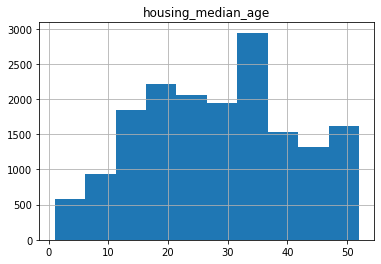

In [52]:
california_housing_dataframe.hist('housing_median_age')

In [53]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [54]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [55]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In [56]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

In [57]:
np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

In [58]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

In [59]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


In [60]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [61]:
cities.index

RangeIndex(start=0, stop=3, step=1)

In [62]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density
2,Sacramento,485199,97.92,4955.055147
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760


In [63]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147
0,San Francisco,852469,46.87,18187.945381
